In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

In [77]:
#specify data types
#acceleration to volleys have + and - after the numbers, so must be imported as string and then split,
#wage and value has characters after the number
dtype = {"Name":str, "Age":int, "Photo":str, "Nationality":str, "Flag":str, "Overall":int, "Potential":int, 
         "Club":str, "Club Logo":str, "Value":str, "Wage":str, "Special":int, "Acceleration":str, "Aggression":str, 
         "Agility":str, "Balance":str, "Ball control":str, "Composure":str, "Crossing":str, "Curve":str, "Dribbling":str, 
         "Finishing":str, "Free kick accuracy":str, "GK diving":str, "GK handling":str, "GK kicking":str, 
         "GK positioning":str, "GK reflexes":str, "Heading accuracy":str, "Interceptions":str, "Jumping":str, 
         "Long passing":str, "Long shots":str, "Marking":str, "Penalties":str, "Positioning":str, "Reactions":str, 
         "Short passing":str, "Shot power":str, "Sliding tackle":str, "Sprint speed":str, "Stamina":str, 
         "Standing tackle":str, "Strength":str, "Vision":str, "Volleys":str, "CAM":float, "CB":float, "CDM":float, "CF":float, 
         "CM":float, "ID":float, "LAM":float, "LB":float, "LCB":float, "LCM":float, "LDM":float, "LF":float, "LM":float, 
         "LS":float, "LW":float, "LWB":float, "Preferred Positions":str, "RAM":float, "RB":float, "RCB":float, "RCM":float, 
         "RDM":float, "RF":float, "RM":float, "RS":float, "RW":float, "RWB":float, "ST":float}

completedata = pd.read_csv("CompleteDataset.csv", dtype = dtype)
completedata.shape

(17981, 75)

In [133]:
#select only variables of interest - we have chosen wage, player value, potential, stamina, speed and freekick accuracy
data = completedata.loc[:,["Wage", "Value", "Potential", "Stamina", "Sprint speed", "Free kick accuracy"]]
data.head(20)

,Wage,Value,Potential,Stamina,Sprint speed,Free kick accuracy
0,€565K,€95.5M,94,92,91,76
1,€565K,€105M,93,73,87,90
2,€280K,€123M,94,78,90,84
3,€510K,€97M,92,89,77,84
4,€230K,€61M,92,44,61,11
5,€355K,€92M,91,79,83,84
6,€215K,€64.5M,92,40,58,19
7,€295K,€90.5M,91,79,87,79
8,€340K,€79M,90,77,52,84
9,€275K,€77M,90,72,80,62


In [134]:
#drop euros
data.Wage = data['Wage'].map(lambda x: x.replace("€",""))
data.Value = data['Value'].map(lambda x: x.replace("€",""))

#parse string for millions and thousands to numeric values
def toNumberCurrency(column):
    if 'M' in column:
        return int(float(column.replace('M', '')) * 1000000)
    elif 'K' in column:
        return int(float(column.replace('K', '')) * 1000)
    else:
        return int(column)   
    
data["Wage"] = data["Wage"].apply(lambda x: toNumberCurrency(x))
data["Value"] = data["Value"].apply(lambda x: toNumberCurrency(x))


#wdf['Value'] = [toFloat(value) for value in wdf['Value']]
#wdf['Wage'] = [toFloat(wage) for wage in wdf['Wage']]

data[["Wage", "Value"]].head()
    

,Wage,Value
0,565000,95500000
1,565000,105000000
2,280000,123000000
3,510000,97000000
4,230000,61000000


We have sucessfully converted the currencies to numeric values, but some columns still contain strings instead of numeric values. For example, row 2800 contains '85-4' for Sprint Speed. We need to convert this to numbers before being able to do the regression.

In [125]:
data.iloc[::200, :]

,Wage,Value,Potential,Stamina,Sprint speed,Free kick accuracy
0,565000,95500000,94,92,91,76
200,105000,26000000,88,86,72,37
400,40000,19500000,84,75,68,80
600,31000,16000000,82,65,78,69
800,24000,8500000,79,39,28,12
1000,86000,14000000,86,78,72,80
1200,61000,9500000,81,68,53,22
1400,30000,9000000,77,70,81,77
1600,21000,5500000,76,25,34,13
1800,6000,7000000,75,73,70,75


In [148]:
#evaluate the + and - in columns with those characters to obtain a int rather than string object
strvalues = ["Free kick accuracy", "Sprint speed", "Stamina"]
cols = [col for col in strvalues]

for i in cols:
    data[i] = data[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

data.iloc[::200, :]

,Wage,Value,Potential,Stamina,Sprint speed,Free kick accuracy
0,565000,95500000,94,92,91,76
200,105000,26000000,88,86,72,37
400,40000,19500000,84,75,68,80
600,31000,16000000,82,65,78,69
800,24000,8500000,79,39,28,12
1000,86000,14000000,86,78,72,80
1200,61000,9500000,81,68,53,22
1400,30000,9000000,77,70,81,77
1600,21000,5500000,76,25,34,13
1800,6000,7000000,75,73,70,75


In [130]:
data.describe()

,Wage,Value,Potential,Stamina,Sprint speed,Free kick accuracy
count,17981.000000,1.798100e+04,17981.000000,17981.000000,17981.000000,17981.000000
mean,11546.966242,2.385390e+06,71.190813,63.272176,64.842445,43.192592
std,23080.000139,5.353970e+06,6.102199,15.942077,14.654377,17.599180
min,0.000000,0.000000e+00,46.000000,12.000000,11.000000,4.000000
25%,2000.000000,3.000000e+05,67.000000,56.000000,57.000000,31.000000
50%,4000.000000,6.750000e+05,71.000000,66.000000,67.000000,42.000000
75%,12000.000000,2.100000e+06,75.000000,74.000000,75.000000,57.000000
max,565000.000000,1.230000e+08,94.000000,116.000000,110.000000,96.000000


Some players earn no wages and have no value - we have to decide whether this is an accurate representation and whether we want to keep them

In [131]:
#examine null values - no null values
data.isnull().sum()

Wage                  0
Value                 0
Potential             0
Stamina               0
Sprint speed          0
Free kick accuracy    0
dtype: int64

We have no missing values in our dataset (unless missing wage and value has been coded as zero). There are also some extremely high values for Wage.

In [155]:
#who are the wage = 0 players?
zerowage = data.loc[data['Wage'] == 0]
print("There are {} players with no wage" .format(len(zerowage)))
zerowage.iloc[::20, :]

There are 248 players with no wage


,Wage,Value,Potential,Stamina,Sprint speed,Free kick accuracy,logWage
162,0,0,86,76,74,77,0.0
2090,0,0,74,41,36,15,0.0
2973,0,0,87,39,51,18,0.0
4361,0,0,72,79,73,56,0.0
5162,0,0,70,66,70,64,0.0
6110,0,0,69,73,72,43,0.0
7117,0,0,74,39,62,23,0.0
8082,0,0,68,30,42,11,0.0
9462,0,0,66,64,67,27,0.0
10874,0,0,65,60,68,32,0.0


As we are really interested in predicted Wage, I will only select players earning an actual wage for now.

In [158]:
cleandata = data.loc[data['Wage'] > 0]
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Data columns (total 7 columns):
Wage                  17733 non-null int64
Value                 17733 non-null int64
Potential             17733 non-null int32
Stamina               17733 non-null int64
Sprint speed          17733 non-null int64
Free kick accuracy    17733 non-null int64
logWage               17733 non-null float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 1.0 MB


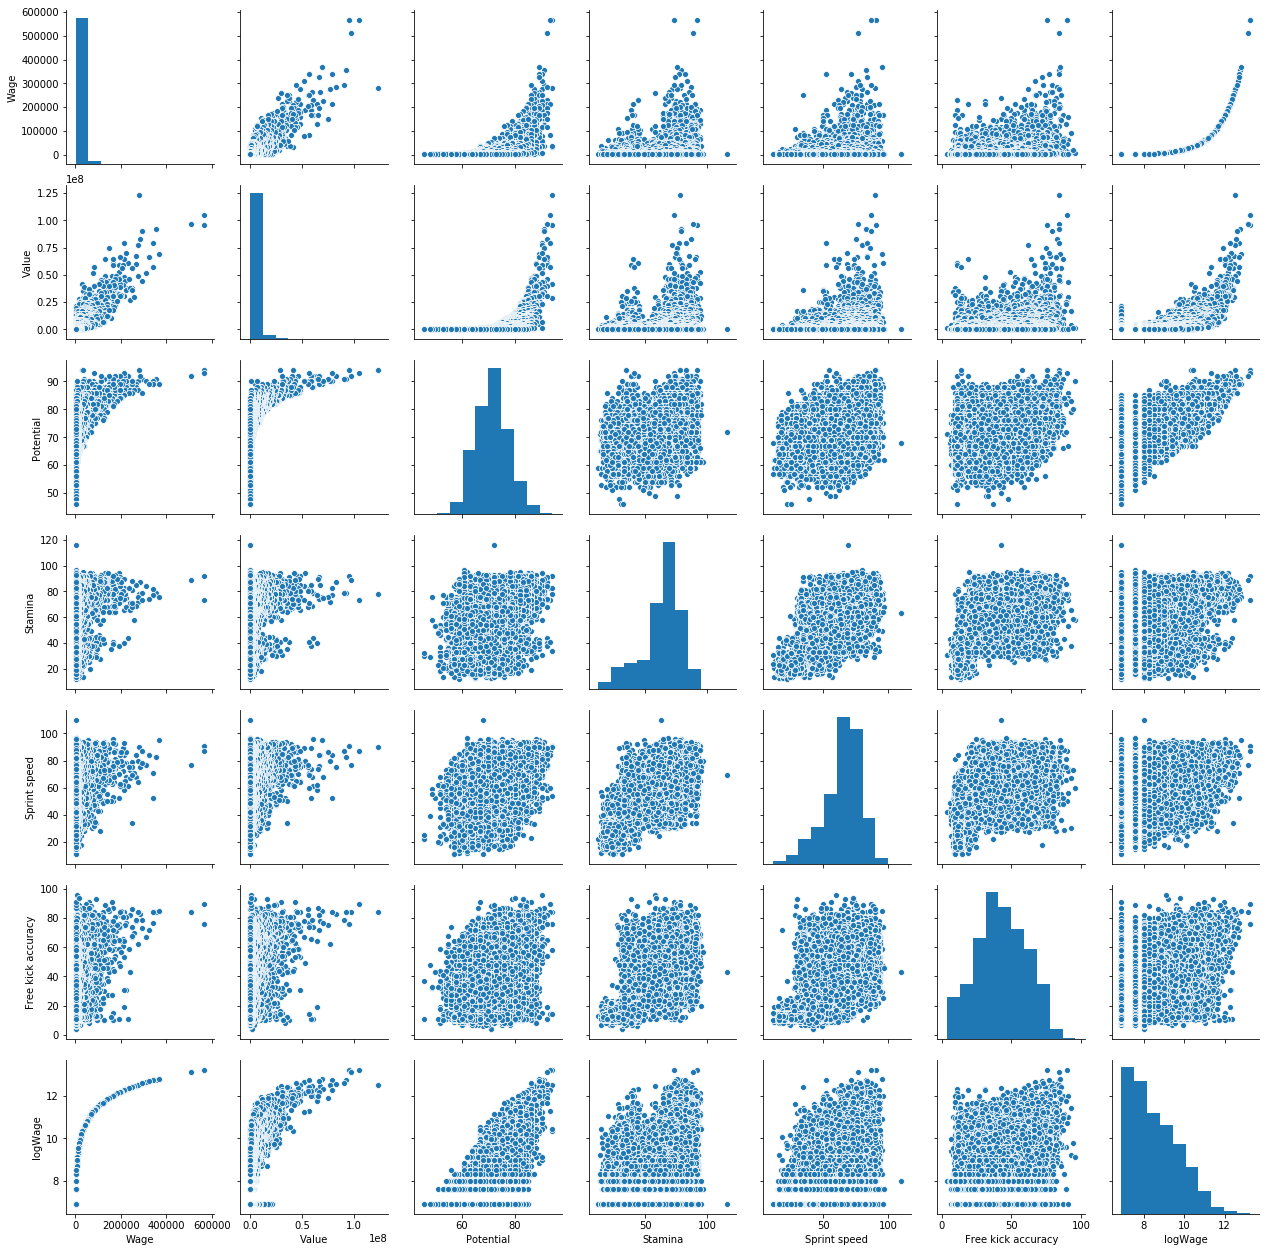

In [159]:
#histograms and scatterplots
sns.pairplot(cleandata);

Wage and value are both positively skewed and should be transformed. Wage and value are very strongly correlated, so it would not be advisable to predict wage from value - these same variables predicting wage may predict a players value.

In [176]:
pd.options.mode.chained_assignment = None  # default='warn'

#log wage and Value
cleandata["logWage"] = np.log(cleandata['Wage'])
cleandata[["Wage", "logWage"]].head()

,Wage,logWage
0,565000.0,13.244581
1,565000.0,13.244581
2,280000.0,12.542545
3,510000.0,13.142166
4,230000.0,12.345835


In [180]:
cleandata.describe()

,Wage,Value,Potential,Stamina,Sprint speed,Free kick accuracy,logWage
count,17733.000000,1.773300e+04,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000
mean,11708.453166,2.418750e+06,71.211978,63.288276,64.857441,43.209778,8.469860
std,23200.122784,5.383791e+06,6.106766,15.928968,14.667631,17.585664,1.276421
min,1000.000000,0.000000e+00,46.000000,12.000000,11.000000,4.000000,6.907755
25%,2000.000000,3.250000e+05,67.000000,56.000000,57.000000,31.000000,7.600902
50%,4000.000000,7.000000e+05,71.000000,66.000000,67.000000,42.000000,8.294050
75%,12000.000000,2.100000e+06,75.000000,74.000000,75.000000,57.000000,9.392662
max,565000.000000,1.230000e+08,94.000000,116.000000,110.000000,96.000000,13.244581


C:\Users\miche\Miniconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\miche\Miniconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

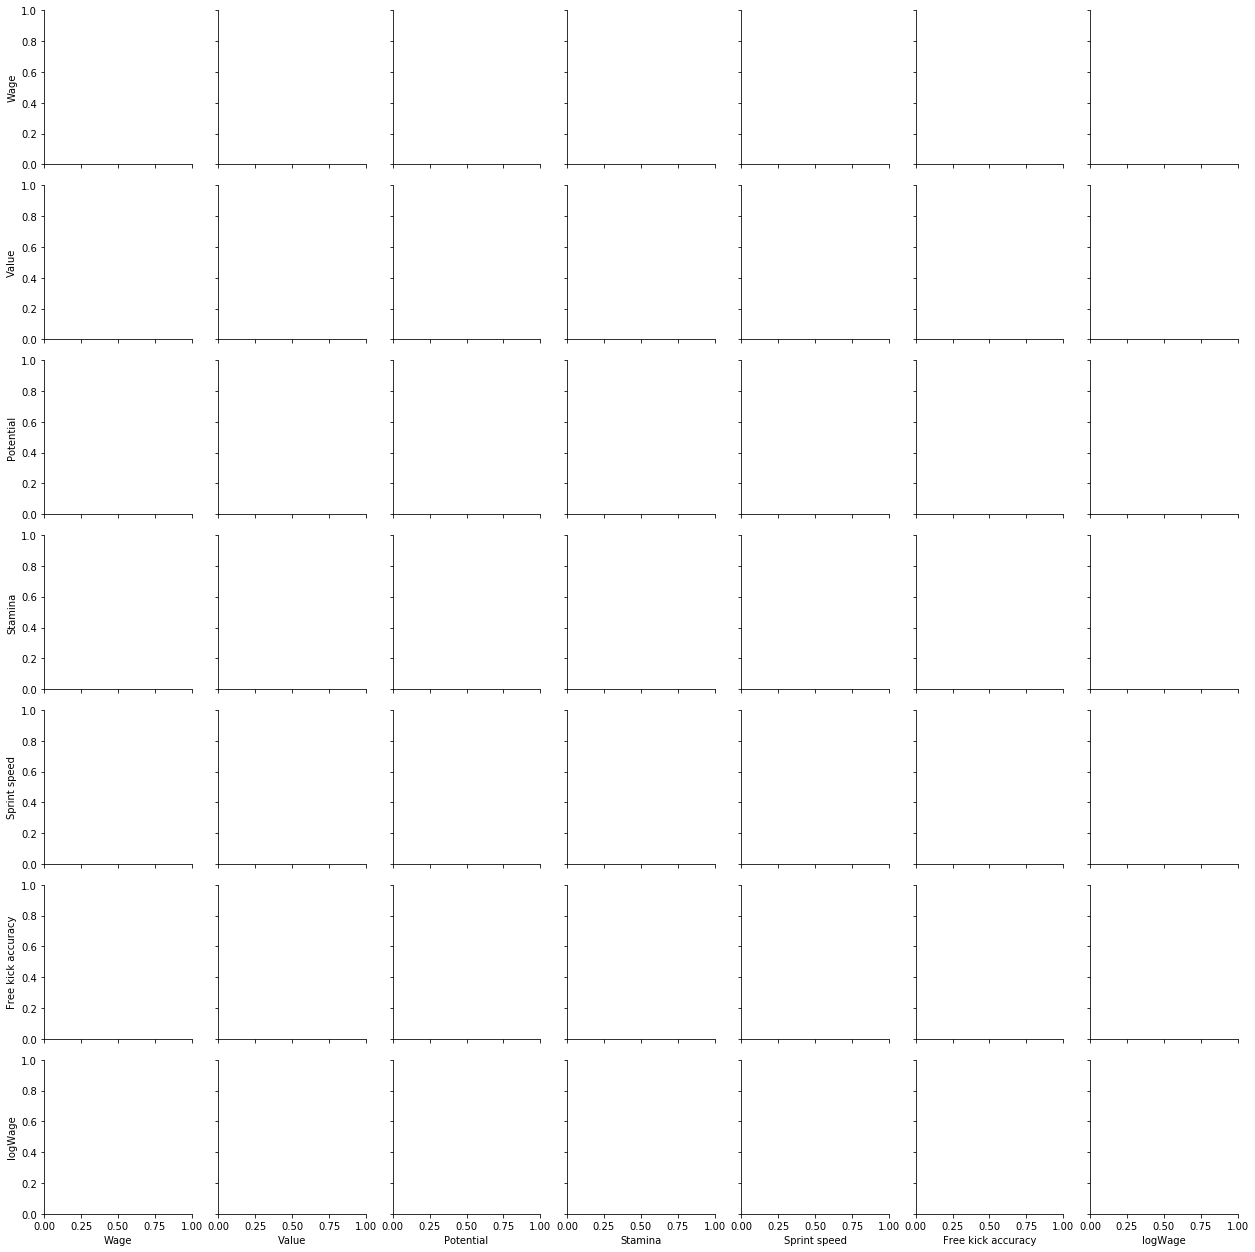

In [182]:
#histograms and scatterplots with logged Wage
#sns.pairplot(cleandata); #why error?

In [25]:
#standardise predictor variables


In [26]:
#multiple regression
# get all of the predictor variable in one dataframe without the outcome variable
#df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (log of wage) in another DataFrame
#target = pd.DataFrame(data.target, columns=["logWage"])

#specify variables
#X = df #predictor variables
#y = target[“logWage] #outcome

#fit model
#lm = linear_model.LinearRegression()
#model = lm.fit(X,y)

#get predicted y values
#predictions = lm.predict(X)

#get R squared
#lm.score(X,y)


#see regression coefficients
#lm.coef_
#lm.intercept_

In [ ]:
#get regression diagnostics

#E.g. get average difference between observed Y and predicted Y
#get scatterplot of predicted Y vs residuals